In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import ee
import geemap
Map= geemap.Map()

In [2]:
lake=ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ALAP-ALTM-195-centroids')

In [3]:
# print(lake.size().getInfo())
# print(lake.aggregate_array('NAME').distinct().getInfo())
# print(lake.first().propertyNames().getInfo())

In [4]:
# Function to create a five-sided polygon around the latitude and longitude
import ee
import geemap

# Function to create a five-sided polygon around the latitude and longitude
def create_lake_polygon(lat, lon):
    # Assuming each pixel is approximately 20 meters in size
    buffer_distance_meters = 3 * 20

    
    # Convert buffer distance from meters to degrees (approximate conversion)
    buffer_distance_degrees = buffer_distance_meters / 111320.0

    # Define the coordinates of the five vertices of the polygon
    coordinates = [
        [lon, lat + buffer_distance_degrees],
        [lon + buffer_distance_degrees, lat + buffer_distance_degrees / 2],
        [lon + buffer_distance_degrees / 2, lat - buffer_distance_degrees / 2],
        [lon - buffer_distance_degrees / 2, lat - buffer_distance_degrees / 2],
        [lon - buffer_distance_degrees, lat + buffer_distance_degrees / 2]
    ]

    # Create the polygon geometry
    polygon = ee.Geometry.Polygon(coordinates)

    return polygon

In [5]:
all_lakes=ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ALAP-ALTM-Lakes-195')
Map.addLayer(all_lakes)
Map.centerObject(all_lakes,16)
Map

Map(center=[44.06877752167093, -74.34748015610103], controls=(WidgetControl(options=['position', 'transparent_…

In [6]:
lake=ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ALAP-ALTM-195-centroids')\
        .filter(ee.Filter.eq('NAME', 'Big Moose Lake'))
lat = ee.Number(lake.first().geometry().coordinates().get(1)).getInfo()
lon = ee.Number(lake.first().geometry().coordinates().get(0)).getInfo()
lake_polygon = ee.Geometry.Point(lon, lat).buffer(100)
Map.addLayer(lake_polygon)
Map.centerObject(lake_polygon,16)
Map

Map(center=[43.830702693708865, -74.84829869692845], controls=(WidgetControl(options=['position', 'transparent…

In [7]:
# Import necessary libraries
import ee
import geemap

# Initialize Earth Engine
ee.Initialize()

# Create a feature for the specific lake you're interested in
lake = ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ALAP-ALTM-195-centroids') \
    .filter(ee.Filter.eq('NAME', 'Lost Pond'))

# Get the coordinates of the point
lat = ee.Number(lake.first().geometry().coordinates().get(1))
lon = ee.Number(lake.first().geometry().coordinates().get(0))

# Create a buffer around the point
lake_polygon = ee.Geometry.Point(lon, lat).buffer(100)



In [8]:
ee.Initialize()

lake_names = ['Windfall Pond', 'Middle Pond', 'Lake Alice 2', 'Lake Alice', 'Jabe Pond', 'Little Jabe Pond', 'Augur Lake',
              'Butternut Pond', 'Trout Pond', 'Bartlett pond', 'Raquette Lake Reservoir', 'Heavens Lake', 'Lake Roxanna',
              'Long Pond-Essex', 'Penfield Pond', 'Putnam Pond', 'Grass Pond', 'Squash Pond', 'Upper St. Regis Lake',
              'Lower St. Regis Lake', 'Spitfire Lake', 'Schroon Lake', 'Sagamore Lake', 'Moose Pond', 'Upper Asuable Lake',
              'Thirteenth Lake', 'Raquette Lake', 'Upper Chateaugay Lake', 'Willys Lake', 'Lake Everest', 'Moss Lake',
              'Amber Lake', 'Arbutus Pond', 'Mirror Lake', 'Rondaxe, Lake', 'Lake Algonquin', 'Limekiln Lake','Eighth Lake', 'Friends Lake', 'Lower Chateaugay Lake', 'Catlin Lake', 'Taylor Pond', 'Cranberry Lake',
              'Little Green Pond', 'East Pine Pond', 'Queer Lake', 'Irving Pond', 'Wolf Pond', 'Fern Lake', 'Lake Eaton',
              'Squaw Lake', 'Deer Pond', 'Clear Pond', 'Lens Lake', 'Zack Pond', 'East Caroga Lake', 'West Caroga Lake',
              'Kiwassa Lake', 'Lake Flower', 'Oseetah Lake', 'Lower Saranac Lake', 'stony Creek Pond', 'Ragged Lake',
              'Blue Mountain Lake', 'Eagle Lake', 'Fourth Lake', 'Jordan Lake', 'Long Pond', 'Lake Kushaqua',
              'Lake Placid', 'Trout Lake', 'Loon Lake', 'Big Moose Lake', 'Tupper Lake', 'Simon Pond', 'White Lake',
              'Floodwood Pond', 'North Lake', 'Indian Lake', 'Twitchell Lake', 'Little Simon Pond', 'Lower Asuable Lake',
              'Oxbow Lake', 'Gull Pond', 'Long Lake', 'Barnes Lake', 'Carry Pond', 'Little Clear Pond', 'Sochia Pond',
              'Little Rainbow Pond', 'Gordon Pond', 'Avalanche Lake', 'Little Hope Pond', 'Pleasant Lake', 'Fifth Lake',
              'Lost Pond', 'Otter Pond', 'Bone Pond', 'Sunday Pond', 'Echo Lake', 'Big Cherry Patch Pond', 'Chapel Pond',
              'Hidden Lake', 'West Pond', 'Copperas Pond', 'Heart Lake', 'Lower Cascade Lake', 'Frank Pond', 'Rush Pond',
              'Constable Pond', 'Morehouse Lake', 'Cascade Lake', 'Split Rock Pond', 'Polliwog Pond', 'Lake Adirondack',
              'Lake Titus', 'Slang Pond', 'Turtle Pond', 'Hoel Pond', 'Franklin Falls Reservoir', 'Mountain View Lake',
              'Rich Lake', 'Rat Pond', 'Alford Pond', 'Lake Colden', 'Lower Beaver Ponds', 'Round Pond', 'Woods Lake',
              'Green Pond', 'Lake Durant', 'Osgood Pond', 'Rainbow Lake', 'Canada Lake', 'Middle Saranac Lake',
              'Union Falls Pond', 'Chazy Lake', 'G Lake', 'Windover Lake', 'Pine Lake', 'Hewitt Pond', 'South Lake',
              'Follensby Clear Pond', 'Loon Hollows Pond', 'Middle Settlement Lake', 'Little Polliwog Pond', 'Black Pond',
              'Little Echo Pond', 'Moody Pond', 'Owl Pond', 'Owen Pond', 'Holcomb Pond', 'Upper Cascade Lake', 'Big Hope Pond',
              'Austin Pond', 'Nate Pond', 'Eli Pond', 'Otter Lake', 'Willis Lake', 'Brook Trout Lake', 'McCauley Pond',
              'Connery Pond', 'Little Long Lake', 'Rollins Pond', 'Paradox Lake', 'Sacandaga Lake', 'Chase Lake', 'Whey Pond',
              'Brandreth Lake', 'Fawn Lake', 'Lake Madeleine,', 'Lake Colby', 'Garnet Lake', 'Star Lake', 'Silver Lake', 'Dart Lake',
              'Mink Pond', 'Spy Lake', 'Lake Clear', 'Lake Pleasant', 'Middle Branch Lake', 'Jockeybush Lake', 'Green Lake',
              'Pine Pond', 'Tripp Pond', 'Horseshoe Pond', 'Fish Creek Pond', 'Fish Creek West', 'Upper Saranac Lake',
              'Fish Creek East', 'Little Square Pond']


# Define the Landsat 5 bands and their corresponding standard names
LC5_BANDS = ['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B7', 'ST_B6', 'QA_PIXEL']
LC8_BANDS = ['SR_B2','SR_B3','SR_B4',  'SR_B5','SR_B6','SR_B7','ST_B10','QA_PIXEL']; #Landsat 8
STD_NAMES = ['blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'temp', 'QA']

all_lakes=ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ALAP-ALTM-Lakes-195')



# Define a function to mask clouds and cloud shadows from Landsat 5 surface reflectance imagery
def maskL457sr(image):
    qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
    saturationMask = image.select('QA_RADSAT').eq(0)

    qa_values_to_filter = [5440, 5442, 5696, 13664]

    mask = image.select('QA_PIXEL').eq(qa_values_to_filter[0])
    for qa_value in qa_values_to_filter[1:]:
        mask = mask.Or(image.select('QA_PIXEL').eq(qa_value))

    filtered_image = image.updateMask(mask)

    opticalBands = filtered_image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBand = filtered_image.select('ST_B6').multiply(0.00341802).add(-124.15)
    return filtered_image.addBands(opticalBands, None, True).addBands(thermalBand, None, True).updateMask(qaMask).updateMask(saturationMask).clip(all_lakes)


def maskL8sr(image):
    qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
    saturationMask = image.select('QA_RADSAT').eq(0)
    
    # Specify the QA values to filter
    qa_values_to_filter = [21824, 21826, 22080, 23888,30048,54596,54852,21952]

    mask = image.select('QA_PIXEL').eq(qa_values_to_filter[0])
    for qa_value in qa_values_to_filter[1:]:
        mask = mask.Or(image.select('QA_PIXEL').eq(qa_value))

    # Apply the mask to filter the image
    filtered_image = image.updateMask(mask)
     # Apply the scaling factors to the appropriate bands.
    opticalBands = filtered_image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBands = filtered_image.select('ST_B.*').multiply(0.00341802).add(-124.15)

    # Replace the original bands with the scaled ones and apply the masks.
    return filtered_image.addBands(opticalBands, None, True) \
        .addBands(thermalBands, None, True) \
        .updateMask(qaMask) \
        .updateMask(saturationMask)\
        .clip(all_lakes)



# Define a function to compute the mean reflectance values for the specified bands within the region of interest (lake)
def reflectance(img, lake):
    reflectance_values = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=lake_polygon, scale=30).select(STD_NAMES)
    return img.set('DATE_SMP', img.date().format()).set('reflectance', reflectance_values)

# Initialize an empty list to store the dataframes for each lake
dfs = []

# Create a dictionary to map each lake name to a numerical label
lake_name_to_label = {lake_name: i for i, lake_name in enumerate(lake_names)}

# # Function to normalize specific bands within the image
# def normalize_image(image):
#     # Select the bands you want to normalize
#     bands_to_normalize = image.select(['blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'temp'])  # Replace with your band names
    
#     # Normalize the selected bands within the image
#     normalized_bands = bands_to_normalize.divide(10000)  # Assuming Landsat 8, so max DN value is 10,000
    
#     # Combine the normalized bands with the original image
#     normalized_image = image.addBands(normalized_bands, None, True)
    
#     return normalized_image

# Loop through each lake name and retrieve Landsat 5 imagery for that lake
for SITE_NAME in lake_names:
    # Retrieve the lake using the filter
    lake=ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ALAP-ALTM-195-centroids')\
         .filter(ee.Filter.eq('NAME', SITE_NAME))

   
    # Get the latitude and longitude of the station point
    lat = ee.Number(lake.first().geometry().coordinates().get(1)).getInfo()
    lon = ee.Number(lake.first().geometry().coordinates().get(0)).getInfo()

     # Create a polygon around the station point using the latitude and longitude
    #lake_polygon = create_lake_polygon(lon, lat).buffer(1000)
    lake_polygon = ee.Geometry.Point(lon, lat).buffer(100)

    # Retrieve Landsat 5 imagery for the specific lake
    l5 = ee.ImageCollection('LANDSAT/LT05/C02/T1_L2') \
        .filter(ee.Filter.calendarRange(5, 12, 'month')) \
        .filter(ee.Filter.calendarRange(1985, 2011, 'year')) \
        .filterBounds(lake_polygon) \
        .filter(ee.Filter.lt('CLOUD_COVER', 15)) \
        .map(maskL457sr) \
        .select(LC5_BANDS, STD_NAMES)

    l8 =ee.ImageCollection('LANDSAT/LC08/C02/T1_L2') \
            .filter(ee.Filter.calendarRange(5, 11, 'month')) \
            .filterBounds(lake_polygon) \
            .filter(ee.Filter.lt('CLOUD_COVER', 15)) \
            .map(maskL8sr) \
            .select(LC8_BANDS, STD_NAMES)
        
    # #merge landsat 5 and landsat 8
    lall = ee.ImageCollection(l5.merge(l8));
    
    # lall_normalized= lall.map(normalize_image)

    # Map the reflectance function over the Landsat 5 ImageCollection for the specific lake
    map_reflectance = lall.map(lambda img: reflectance(img, lake_polygon))

    # Reduce the mapped image collection to get reflectance values for the specific lake
    list_reflectance = map_reflectance.reduceColumns(ee.Reducer.toList(2), ['DATE_SMP', 'reflectance']).values().get(0)

    # Convert the results to a pandas DataFrame
    df_reflectance = pd.DataFrame(list_reflectance.getInfo(), columns=['DATE_SMP', 'reflectance'])
    df_reflectance['DATE_SMP'] = pd.to_datetime(df_reflectance['DATE_SMP'])
    df_reflectance['DATE_SMP'] = df_reflectance['DATE_SMP'].dt.date
    df_reflectance['reflectance'] = df_reflectance['reflectance'].apply(lambda x: {k: v for k, v in x.items() if v is not None})

    # Unpack the 'reflectance' dictionary and create separate columns for each band
    df_reflectance = pd.concat([df_reflectance.drop('reflectance', axis=1),
                                df_reflectance['reflectance'].apply(pd.Series).astype('float64', errors='ignore')], axis=1)

    # Add a new column for the lake name
    df_reflectance['SITE_NAME'] = SITE_NAME

    # Add a new column for the lake label (numeric representation)
    df_reflectance['LAKE_LABEL'] = lake_name_to_label[SITE_NAME]

    # Add the DataFrame to the list
    dfs.append(df_reflectance)


# Concatenate all DataFrames into a single DataFrame
df_all_lakes = pd.concat(dfs, ignore_index=True)

# Sort the DataFrame by 'DATE_SMP' in ascending order
df_all_lakes.sort_values(by='DATE_SMP', inplace=True)

df_all_lakes.dropna(inplace=True)

df_all_lakes

#36361 rows × 11 columns

,DATE_SMP,QA,blue,green,nir,red,swir1,swir2,temp,SITE_NAME,LAKE_LABEL
31313,1985-07-13,5440.0,0.029191,0.036949,0.051717,0.029565,0.020518,0.014701,21.071747,Pine Lake,138
21065,1985-07-13,5440.0,0.018980,0.026646,0.042051,0.014828,0.012568,0.008769,23.820851,Pleasant Lake,93
10279,1985-07-13,5440.0,0.017523,0.022848,0.035295,0.014741,0.009729,0.005612,19.960688,Wolf Pond,47
17681,1985-07-13,5440.0,0.015641,0.017261,0.027386,0.008909,0.004659,0.002310,20.627073,Indian Lake,78
21303,1985-07-13,5440.0,0.016462,0.021796,0.052635,0.015258,0.020634,0.008874,22.004386,Fifth Lake,94
...,...,...,...,...,...,...,...,...,...,...,...
39864,2023-10-03,21951.2,0.004570,0.009646,0.017625,0.006981,0.009872,0.005550,20.449598,Jockeybush Lake,180
18764,2023-10-03,21952.0,0.004939,0.009488,0.012856,0.007258,0.006703,0.003897,21.345923,Oxbow Lake,82
25407,2023-10-03,21952.0,0.007011,0.011721,0.014359,0.007945,0.007443,0.004198,21.185520,Split Rock Pond,112
16677,2023-10-03,21952.0,0.001926,0.004874,0.006694,0.001955,0.004118,0.002953,20.647198,Tupper Lake,73


In [9]:
df_all_lakes['SITE_NAME'] = df_all_lakes['SITE_NAME'].str.replace('*', '')
df_all_lakes

,DATE_SMP,QA,blue,green,nir,red,swir1,swir2,temp,SITE_NAME,LAKE_LABEL
31313,1985-07-13,5440.0,0.029191,0.036949,0.051717,0.029565,0.020518,0.014701,21.071747,Pine Lake,138
21065,1985-07-13,5440.0,0.018980,0.026646,0.042051,0.014828,0.012568,0.008769,23.820851,Pleasant Lake,93
10279,1985-07-13,5440.0,0.017523,0.022848,0.035295,0.014741,0.009729,0.005612,19.960688,Wolf Pond,47
17681,1985-07-13,5440.0,0.015641,0.017261,0.027386,0.008909,0.004659,0.002310,20.627073,Indian Lake,78
21303,1985-07-13,5440.0,0.016462,0.021796,0.052635,0.015258,0.020634,0.008874,22.004386,Fifth Lake,94
...,...,...,...,...,...,...,...,...,...,...,...
39864,2023-10-03,21951.2,0.004570,0.009646,0.017625,0.006981,0.009872,0.005550,20.449598,Jockeybush Lake,180
18764,2023-10-03,21952.0,0.004939,0.009488,0.012856,0.007258,0.006703,0.003897,21.345923,Oxbow Lake,82
25407,2023-10-03,21952.0,0.007011,0.011721,0.014359,0.007945,0.007443,0.004198,21.185520,Split Rock Pond,112
16677,2023-10-03,21952.0,0.001926,0.004874,0.006694,0.001955,0.004118,0.002953,20.647198,Tupper Lake,73


In [10]:
# from sklearn.preprocessing import MinMaxScaler

# # Initialize the MinMaxScaler with the desired feature range
# scaler = MinMaxScaler(feature_range=(0, 1))

# # List of bands you want to normalize
# bands_to_normalize = ['blue', 'green', 'nir', 'red', 'swir1', 'swir2', 'temp']

# # Normalize the selected columns
# df_all_lakes[bands_to_normalize] = scaler.fit_transform(df_all_lakes[bands_to_normalize])

# # The selected columns have been normalized to the range [0, 1]


In [11]:
df_all_lakes

,DATE_SMP,QA,blue,green,nir,red,swir1,swir2,temp,SITE_NAME,LAKE_LABEL
31313,1985-07-13,5440.0,0.029191,0.036949,0.051717,0.029565,0.020518,0.014701,21.071747,Pine Lake,138
21065,1985-07-13,5440.0,0.018980,0.026646,0.042051,0.014828,0.012568,0.008769,23.820851,Pleasant Lake,93
10279,1985-07-13,5440.0,0.017523,0.022848,0.035295,0.014741,0.009729,0.005612,19.960688,Wolf Pond,47
17681,1985-07-13,5440.0,0.015641,0.017261,0.027386,0.008909,0.004659,0.002310,20.627073,Indian Lake,78
21303,1985-07-13,5440.0,0.016462,0.021796,0.052635,0.015258,0.020634,0.008874,22.004386,Fifth Lake,94
...,...,...,...,...,...,...,...,...,...,...,...
39864,2023-10-03,21951.2,0.004570,0.009646,0.017625,0.006981,0.009872,0.005550,20.449598,Jockeybush Lake,180
18764,2023-10-03,21952.0,0.004939,0.009488,0.012856,0.007258,0.006703,0.003897,21.345923,Oxbow Lake,82
25407,2023-10-03,21952.0,0.007011,0.011721,0.014359,0.007945,0.007443,0.004198,21.185520,Split Rock Pond,112
16677,2023-10-03,21952.0,0.001926,0.004874,0.006694,0.001955,0.004118,0.002953,20.647198,Tupper Lake,73


In [12]:
# Remove duplicates in the 'SITE_NAME' column
unique_lake_names = df_all_lakes['SITE_NAME'].drop_duplicates()

# Count the number of unique lake names
num_unique_lakes = unique_lake_names.nunique()

# Print the unique lake names and the count
print(f"Number of Unique Lakes: {num_unique_lakes}")

#output:Number of Unique Lakes: 199
#after dropping null values the lakes are still 199

Number of Unique Lakes: 189


In [13]:
import pandas as pd


# Read the Excel file
data_excel = pd.read_excel("LTM_Data_2023_3_9 (2).xlsx", usecols=['DOC_MG_L', 'SITE_ID', 'DATE_SMP', 'SAMPLE_LOCATION'])
data_excel_site = pd.read_excel("Site_Information_2022_8_1 (2).xlsx", usecols=['SITE_ID', 'PROGRAM_ID', 'SITE_NAME','LAKE_DEPTH_MEAN'])

data_second_sheet_COORD = pd.read_excel("ALTM-50-stations (1).xlsx",
                                 sheet_name='updated station coordinates', usecols=['SITE_ID', 'LATDD', 'LONDD','LATDD_CENT','LONDD_CENT','SITE_NAME'])

# Merge the two DataFrames based on the common column 'SITE_ID'
merged_data_excel = pd.merge(data_excel, data_excel_site, on=['SITE_ID'])
merged_data_combined = pd.merge(merged_data_excel, data_second_sheet_COORD, on=['SITE_ID', 'SITE_NAME'])

data_modified = merged_data_combined.drop(columns=['SAMPLE_LOCATION'])


#pd.set_option('display.max_rows', None)
# Display the merged DataFrame
(data_modified)


,SITE_ID,DATE_SMP,DOC_MG_L,PROGRAM_ID,SITE_NAME,LAKE_DEPTH_MEAN,LATDD,LONDD,LATDD_CENT,LONDD_CENT
0,040850,1997-09-22,3.100000,LTM_ALTM,Squaw Lake,3.4,43.63645,-74.73844,43.63276,-74.73863
1,040850,1997-09-22,3.100000,LTM_ME,Squaw Lake,3.4,43.63645,-74.73844,43.63276,-74.73863
2,040850,1995-03-02,3.031000,LTM_ALTM,Squaw Lake,3.4,43.63645,-74.73844,43.63276,-74.73863
3,040850,1995-03-02,3.031000,LTM_ME,Squaw Lake,3.4,43.63645,-74.73844,43.63276,-74.73863
4,040850,1996-08-19,3.595000,LTM_ALTM,Squaw Lake,3.4,43.63645,-74.73844,43.63276,-74.73863
...,...,...,...,...,...,...,...,...,...,...
17863,1A3-048,2011-05-18,4.283944,LTM_ALTM,Grass Pond,1.5,43.69066,-75.06462,43.69207,-75.06172
17864,1A3-048,2015-06-10,5.509394,LTM_ALTM,Grass Pond,1.5,43.69066,-75.06462,43.69207,-75.06172
17865,1A3-048,2016-07-14,4.884900,LTM_ALTM,Grass Pond,1.5,43.69066,-75.06462,43.69207,-75.06172
17866,1A3-048,2016-09-15,6.344000,LTM_ALTM,Grass Pond,1.5,43.69066,-75.06462,43.69207,-75.06172


In [14]:
data_ALAP = pd.read_excel("AWI-ADK.xlsx", usecols=['AWI Site ID', 'AWI Waterbody ID', 'Waterbody Name', 'Parameter','Sample Date','Reported Value','Units'])
doc_data = data_ALAP[data_ALAP['Parameter'] == 'Dissolved Organic Carbon']


doc_data

,AWI Site ID,AWI Waterbody ID,Waterbody Name,Sample Date,Parameter,Reported Value,Units
62,AWI00001.1,AWI00001,Lower St. Regis Lake,2017-06-21,Dissolved Organic Carbon,4.510,mg/L
65,AWI00001.1,AWI00001,Lower St. Regis Lake,2017-07-21,Dissolved Organic Carbon,6.060,mg/L
68,AWI00001.1,AWI00001,Lower St. Regis Lake,2017-08-03,Dissolved Organic Carbon,6.110,mg/L
71,AWI00001.1,AWI00001,Lower St. Regis Lake,2017-08-30,Dissolved Organic Carbon,5.970,mg/L
74,AWI00001.1,AWI00001,Lower St. Regis Lake,2017-09-27,Dissolved Organic Carbon,5.600,mg/L
...,...,...,...,...,...,...,...
8720,AWI00318.1,AWI00318,Green Lake,2022-07-20,Dissolved Organic Carbon,2.671,mg/L
8723,AWI00318.1,AWI00318,Green Lake,2022-08-15,Dissolved Organic Carbon,2.782,mg/L
8726,AWI00319.1,AWI00319,Ragged Lake,2022-08-12,Dissolved Organic Carbon,11.710,mg/L
8729,AWI00319.1,AWI00319,Ragged Lake,2022-09-17,Dissolved Organic Carbon,11.500,mg/L


In [15]:
alap_data= pd.read_excel("ALAP_DATA (1).xlsx")
alap_data.rename(columns={'LAKE_NAME': 'Waterbody Name'}, inplace=True)
alap_data = alap_data[~alap_data.applymap(lambda x: isinstance(x, (str, bytes)) and '-' in x).any(axis=1)]

alap_data

,WATERBODY_ID,Waterbody Name,LAT,LON,LAKE_DEPTH (m),SURFACE_AREA (ha),TROPHIC_STATE
0,AWI00001,Lower St. Regis Lake,44.427034,-74.248048,11.6,NaN,Mesotrophic
1,AWI00002,Spitfire Lake,44.417981,-74.269630,9.4,NaN,Mesotrophic
2,AWI00003,Upper St. Regis Lake,44.408394,-74.285134,20.1,NaN,Mesotrophic
3,AWI00004,Butternut Pond,44.430696,-73.495663,6.3,65.8,Oligotrophic
4,AWI00006,Osgood Pond,44.451070,-74.228505,4.6,108.0,Mesotrophic
...,...,...,...,...,...,...,...
157,AWI00262,Whey Pond,44.307694,-74.392854,6.1,47.4,Mesotrophic
158,AWI00263,West Caroga Lake,43.137154,-74.495462,21.3,129.0,Oligotrophic
160,AWI00317,Bartlett Pond,44.106152,-73.511043,6.1,40.0,Oligotrophic
161,AWI00318,Green Lake,43.175716,-74.506639,16.7,NaN,Oligotrophic


In [16]:
merged_alap_excel = pd.merge(doc_data, alap_data, on=['Waterbody Name'])
merged_alap_excel.rename(columns={'AWI Waterbody ID': 'SITE_ID' }, inplace=True)
merged_alap_excel.rename(columns={'Waterbody Name': 'SITE_NAME' }, inplace=True)
merged_alap_excel.rename(columns={'Reported Value': 'DOC_MG_L'}, inplace=True)
merged_alap_excel.rename(columns={'LAKE_DEPTH (m)': 'LAKE_DEPTH_MEAN'}, inplace=True)
merged_alap_excel.rename(columns={'Sample Date': 'DATE_SMP'}, inplace=True)
merged_alap_excel = merged_alap_excel[~merged_alap_excel.applymap(lambda x: isinstance(x, (str, bytes)) and '-' in x).any(axis=1)]

selected_columns_alap = merged_alap_excel[['SITE_ID', 'DATE_SMP', 'DOC_MG_L', 'SITE_NAME', 'LAKE_DEPTH_MEAN']]
selected_columns_alap


,SITE_ID,DATE_SMP,DOC_MG_L,SITE_NAME,LAKE_DEPTH_MEAN
0,AWI00001,2017-06-21,4.510,Lower St. Regis Lake,11.6
1,AWI00001,2017-07-21,6.060,Lower St. Regis Lake,11.6
2,AWI00001,2017-08-03,6.110,Lower St. Regis Lake,11.6
3,AWI00001,2017-08-30,5.970,Lower St. Regis Lake,11.6
4,AWI00001,2017-09-27,5.600,Lower St. Regis Lake,11.6
...,...,...,...,...,...
1571,AWI00317,2022-08-16,4.685,Bartlett Pond,6.1
1572,AWI00317,2022-09-20,4.532,Bartlett Pond,6.1
1573,AWI00319,2022-08-12,11.710,Ragged Lake,15.2
1574,AWI00319,2022-09-17,11.500,Ragged Lake,15.2


In [17]:
selected_columns_ALTM = data_modified[['SITE_ID', 'DATE_SMP', 'DOC_MG_L', 'SITE_NAME', 'LAKE_DEPTH_MEAN']]

# Divide the 'LAKE_DEPTH_MEAN' column by 100
# selected_columns_ALTM['LAKE_DEPTH_MEAN'] = selected_columns_ALTM['LAKE_DEPTH_MEAN'] / 1000

selected_columns_ALTM

,SITE_ID,DATE_SMP,DOC_MG_L,SITE_NAME,LAKE_DEPTH_MEAN
0,040850,1997-09-22,3.100000,Squaw Lake,3.4
1,040850,1997-09-22,3.100000,Squaw Lake,3.4
2,040850,1995-03-02,3.031000,Squaw Lake,3.4
3,040850,1995-03-02,3.031000,Squaw Lake,3.4
4,040850,1996-08-19,3.595000,Squaw Lake,3.4
...,...,...,...,...,...
17863,1A3-048,2011-05-18,4.283944,Grass Pond,1.5
17864,1A3-048,2015-06-10,5.509394,Grass Pond,1.5
17865,1A3-048,2016-07-14,4.884900,Grass Pond,1.5
17866,1A3-048,2016-09-15,6.344000,Grass Pond,1.5


In [18]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Normalize the 'LAKE_DEPTH_MEAN' column
selected_columns_ALTM['LAKE_DEPTH_MEAN'] = scaler.fit_transform(selected_columns_ALTM[['LAKE_DEPTH_MEAN']])


In [19]:
selected_columns_ALTM

,SITE_ID,DATE_SMP,DOC_MG_L,SITE_NAME,LAKE_DEPTH_MEAN
0,040850,1997-09-22,3.100000,Squaw Lake,0.262136
1,040850,1997-09-22,3.100000,Squaw Lake,0.262136
2,040850,1995-03-02,3.031000,Squaw Lake,0.262136
3,040850,1995-03-02,3.031000,Squaw Lake,0.262136
4,040850,1996-08-19,3.595000,Squaw Lake,0.262136
...,...,...,...,...,...
17863,1A3-048,2011-05-18,4.283944,Grass Pond,0.077670
17864,1A3-048,2015-06-10,5.509394,Grass Pond,0.077670
17865,1A3-048,2016-07-14,4.884900,Grass Pond,0.077670
17866,1A3-048,2016-09-15,6.344000,Grass Pond,0.077670


In [20]:
# merge_50_87 = pd.merge(data_modified, merged_alap_excel, on='DATE_SMP')
# merge_50_87
concatenated_df = pd.concat([selected_columns_ALTM, selected_columns_alap], axis=0, ignore_index=True)
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Normalize the 'LAKE_DEPTH_MEAN' column
concatenated_df['LAKE_DEPTH_MEAN'] = scaler.fit_transform(concatenated_df[['LAKE_DEPTH_MEAN']])

concatenated_df.dropna(inplace=True)
concatenated_df

,SITE_ID,DATE_SMP,DOC_MG_L,SITE_NAME,LAKE_DEPTH_MEAN
0,040850,1997-09-22,3.100,Squaw Lake,0.004854
1,040850,1997-09-22,3.100,Squaw Lake,0.004854
2,040850,1995-03-02,3.031,Squaw Lake,0.004854
3,040850,1995-03-02,3.031,Squaw Lake,0.004854
4,040850,1996-08-19,3.595,Squaw Lake,0.004854
...,...,...,...,...,...
19439,AWI00317,2022-08-16,4.685,Bartlett Pond,0.112963
19440,AWI00317,2022-09-20,4.532,Bartlett Pond,0.112963
19441,AWI00319,2022-08-12,11.710,Ragged Lake,0.281481
19442,AWI00319,2022-09-17,11.500,Ragged Lake,0.281481


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler



df_all_lakes['DATE_SMP'] = pd.to_datetime(df_all_lakes['DATE_SMP'])
concatenated_df['DATE_SMP'] = pd.to_datetime(concatenated_df['DATE_SMP'])

df_all_lakes.sort_values('DATE_SMP', inplace=True)
concatenated_df.sort_values('DATE_SMP', inplace=True)




merged_data_all = pd.merge_asof(concatenated_df, df_all_lakes, on='DATE_SMP', by=['SITE_NAME'], tolerance=pd.Timedelta(days=1))
merged_data_all['LAKE_DEPTH_MEAN'] = pd.to_numeric(merged_data_all['LAKE_DEPTH_MEAN'], errors='coerce')

# Drop rows where the 'Reflectance' column is null
merged_data_all = merged_data_all.dropna(subset=['blue'])

merged_data_all = merged_data_all.dropna(subset=['DOC_MG_L'])

# merged_data_all = merged_data_all[merged_data_all['PROGRAM_ID'] == 'LTM_ALTM']


# Display the updated DataFrame
# print(merged_data)
merged_data_all


# Preprocessing the 'DATE_SMP' column to extract useful features
merged_data_all['DATE_SMP'] = pd.to_datetime(merged_data_all['DATE_SMP'])  # Convert to datetime if not already done
merged_data_all['year'] = merged_data_all['DATE_SMP'].dt.year
merged_data_all['month'] = merged_data_all['DATE_SMP'].dt.month
merged_data_all['day'] = merged_data_all['DATE_SMP'].dt.day
# merged_data_all['day_of_week'] = merged_data_all['DATE_SMP'].dt.dayofweek

# Drop the original 'DATE_SMP' column as it is no longer needed
merged_data_all = merged_data_all.drop(columns=['DATE_SMP'])


# Calculate NDWI and MNDWI
merged_data_all['NDWI'] = (merged_data_all['green'] - merged_data_all['nir']) / (merged_data_all['green'] + merged_data_all['nir'])
merged_data_all['MNDWI'] = (merged_data_all['green'] - merged_data_all['swir1']) / (merged_data_all['green'] + merged_data_all['swir1'])


# Preparing the training data 
X = merged_data_all[['blue', 'green', 'red', 'nir', 'swir1', 'swir2']]  # Features
y = merged_data_all['DOC_MG_L']  # Target variable



# Group the data by 'LAKE_LABEL'
grouped_data = merged_data_all.groupby('LAKE_LABEL')

min_samples = 20  # Adjust this value based on your dataset and requirements

# Initialize lists to store the training and testing data for all lakes
X_train_all, X_test_all, y_train_all, y_test_all = [], [], [], []



# The 'LAKE_DEPTH_MEAN' column remains unchanged

# Re-train and evaluate the models with the updated data
# ... (your model training and evaluation code)

# Loop through each lake group and split data into training and testing sets
for _, lake_group in grouped_data:
    X_lake = lake_group[['blue', 'green', 'red', 'nir', 'swir1', 'swir2']]
    y_lake = lake_group['DOC_MG_L']

    if len(lake_group) >= min_samples:
        # Split data into training and testing sets for the current lake
        X_train_lake, X_test_lake, y_train_lake, y_test_lake = train_test_split(X_lake, y_lake, test_size=0.3, random_state=42)

        # Append the data for the current lake to the corresponding lists
        X_train_all.append(X_train_lake)
        X_test_all.append(X_test_lake)
        y_train_all.append(y_train_lake)
        y_test_all.append(y_test_lake)

# Concatenate the training and testing data for all lakes
X_train = pd.concat(X_train_all)
X_test = pd.concat(X_test_all)
y_train = pd.concat(y_train_all)
y_test = pd.concat(y_test_all)

print('**************Data Points Used***************************')
num_rows, num_cols = X.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Initialize models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(),
    'MLPRegressor': MLPRegressor(random_state=42)
}

# Initialize lists to store model evaluation results
model_names, r2_scores, mses, rmses, maes = [], [], [], [], []

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict DOC values for the testing data
    y_pred = model.predict(X_test)

    # Create DataFrames for the training and testing data with all bands and the predicted values
    data_train = X_train.copy()
    data_train['original_DOC'] = y_train
    data_train['predicted_DOC'] = model.predict(X_train)

    data_test = X_test.copy()
    data_test['original_DOC'] = y_test
    data_test['predicted_DOC'] = y_pred

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)

    # Append the results to the lists
    model_names.append(model_name)
    r2_scores.append(r2)
    mses.append(mse)
    rmses.append(rmse)
    maes.append(mae)

    # Display the predicted DOC values for the training and testing data
    print(f'*************Predicted Training data ({model_name})***************')
    print(data_train)

    print(f'*************Predicted Testing data ({model_name})***************')
    print(data_test)

# Create a dataframe to store the results
evaluation_df_all = pd.DataFrame({
    'Model': model_names,
    'R^2': r2_scores,
    'MSE': mses,
    'RMSE': rmses,
    'MAE': maes
})

# Print the dataframe
print('# Bands AS FEATURES 1 day window/n')
print(evaluation_df_all)

**************Data Points Used***************************
Number of rows: 540
Number of columns: 6
*************Predicted Training data (RandomForest)***************
           blue     green       red       nir     swir1     swir2  \
10652  0.013928  0.027062  0.022695  0.084888  0.030330  0.015050   
931    0.043649  0.056494  0.049332  0.113110  0.045692  0.031780   
17844  0.002510  0.006531  0.002336  0.012770  0.005030  0.002930   
16843  0.020935  0.029103  0.028889  0.036401  0.032087  0.026369   
16157  0.002323  0.006531  0.003507  0.012200  0.004938  0.002297   
711    0.037082  0.042678  0.036255  0.056620  0.034598  0.022383   
9342   0.028453  0.035613  0.033335  0.082135  0.038003  0.021680   
18796  0.030619  0.040497  0.038434  0.054741  0.042283  0.033649   
2116   0.018899  0.026985  0.025873  0.060408  0.027559  0.017371   
15360  0.004385  0.010586  0.008161  0.020142  0.019184  0.014620   
3493   0.011678  0.017191  0.009082  0.041533  0.009601  0.005341   
9533  

In [22]:

# Remove duplicates in the 'SITE_NAME' column
unique_lake_names = merged_data_all['SITE_NAME'].drop_duplicates()

# Count the number of unique lake names
num_unique_lakes = unique_lake_names.nunique()

# Print the unique lake names and the count
print(f"Number of Unique Lakes: {num_unique_lakes}")

#Number of Unique Lakes: 80

Number of Unique Lakes: 91


In [23]:
# Assuming you have already trained a Random Forest model
random_forest_model = models['XGBoost']
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame to display the feature importances with their corresponding column names
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
print("XGBoost Feature Importances:")
print(feature_importance_df)


XGBoost Feature Importances:
  Feature  Importance
0    blue    0.049890
1   green    0.126840
2     red    0.199713
3     nir    0.260224
4   swir1    0.197578
5   swir2    0.165754


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler



df_all_lakes['DATE_SMP'] = pd.to_datetime(df_all_lakes['DATE_SMP'])
concatenated_df['DATE_SMP'] = pd.to_datetime(concatenated_df['DATE_SMP'])

df_all_lakes.sort_values('DATE_SMP', inplace=True)
concatenated_df.sort_values('DATE_SMP', inplace=True)




merged_data_all = pd.merge_asof(concatenated_df, df_all_lakes, on='DATE_SMP', by=['SITE_NAME'], tolerance=pd.Timedelta(days=3))
merged_data_all['LAKE_DEPTH_MEAN'] = pd.to_numeric(merged_data_all['LAKE_DEPTH_MEAN'], errors='coerce')

# Drop rows where the 'Reflectance' column is null
merged_data_all = merged_data_all.dropna(subset=['blue'])

merged_data_all = merged_data_all.dropna(subset=['DOC_MG_L'])

# merged_data_all = merged_data_all[merged_data_all['PROGRAM_ID'] == 'LTM_ALTM']


# Display the updated DataFrame
# print(merged_data)
merged_data_all


# Preprocessing the 'DATE_SMP' column to extract useful features
merged_data_all['DATE_SMP'] = pd.to_datetime(merged_data_all['DATE_SMP'])  # Convert to datetime if not already done
merged_data_all['year'] = merged_data_all['DATE_SMP'].dt.year
merged_data_all['month'] = merged_data_all['DATE_SMP'].dt.month
merged_data_all['day'] = merged_data_all['DATE_SMP'].dt.day
# merged_data_all['day_of_week'] = merged_data_all['DATE_SMP'].dt.dayofweek

# Drop the original 'DATE_SMP' column as it is no longer needed
merged_data_all = merged_data_all.drop(columns=['DATE_SMP'])


# Calculate NDWI and MNDWI
merged_data_all['NDWI'] = (merged_data_all['green'] - merged_data_all['nir']) / (merged_data_all['green'] + merged_data_all['nir'])
merged_data_all['MNDWI'] = (merged_data_all['green'] - merged_data_all['swir1']) / (merged_data_all['green'] + merged_data_all['swir1'])


# Preparing the training data 
X = merged_data_all[['blue', 'green', 'red', 'nir', 'swir1', 'swir2']]  # Features
y = merged_data_all['DOC_MG_L']  # Target variable

# Group the data by 'LAKE_LABEL'
grouped_data = merged_data_all.groupby('LAKE_LABEL')

min_samples = 35  # Adjust this value based on your dataset and requirements

# Initialize lists to store the training and testing data for all lakes
X_train_all, X_test_all, y_train_all, y_test_all = [], [], [], []

# Loop through each lake group and split data into training and testing sets
for _, lake_group in grouped_data:
    X_lake = lake_group[['blue', 'green', 'red', 'nir', 'swir1', 'swir2']]
    y_lake = lake_group['DOC_MG_L']

    if len(lake_group) >= min_samples:
        # Split data into training and testing sets for the current lake
        X_train_lake, X_test_lake, y_train_lake, y_test_lake = train_test_split(X_lake, y_lake, test_size=0.3, random_state=42)

        # Append the data for the current lake to the corresponding lists
        X_train_all.append(X_train_lake)
        X_test_all.append(X_test_lake)
        y_train_all.append(y_train_lake)
        y_test_all.append(y_test_lake)

# Concatenate the training and testing data for all lakes
X_train = pd.concat(X_train_all)
X_test = pd.concat(X_test_all)
y_train = pd.concat(y_train_all)
y_test = pd.concat(y_test_all)

print('**************Data Points Used***************************')
num_rows, num_cols = X.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Initialize models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(),
    'MLPRegressor': MLPRegressor(random_state=42)
}

# Initialize lists to store model evaluation results
model_names, r2_scores, mses, rmses, maes = [], [], [], [], []

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict DOC values for the testing data
    y_pred = model.predict(X_test)

    # Create DataFrames for the training and testing data with all bands and the predicted values
    data_train = X_train.copy()
    data_train['original_DOC'] = y_train
    data_train['predicted_DOC'] = model.predict(X_train)

    data_test = X_test.copy()
    data_test['original_DOC'] = y_test
    data_test['predicted_DOC'] = y_pred

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)

    # Append the results to the lists
    model_names.append(model_name)
    r2_scores.append(r2)
    mses.append(mse)
    rmses.append(rmse)
    maes.append(mae)

    # Display the predicted DOC values for the training and testing data
    print(f'*************Predicted Training data ({model_name})***************')
    print(data_train)

    print(f'*************Predicted Testing data ({model_name})***************')
    print(data_test)

# Create a dataframe to store the results
evaluation_df_all = pd.DataFrame({
    'Model': model_names,
    'R^2': r2_scores,
    'MSE': mses,
    'RMSE': rmses,
    'MAE': maes
})

# Print the dataframe
print('# Bands AS FEATURES 3 day window/n')
print(evaluation_df_all)

**************Data Points Used***************************
Number of rows: 933
Number of columns: 6
*************Predicted Training data (RandomForest)***************
           blue     green       red       nir     swir1     swir2  \
12083  0.041764  0.049320  0.046503  0.066754  0.043534  0.037656   
6752   0.033849  0.038992  0.033317  0.048224  0.026427  0.023881   
13356  0.056690  0.057213  0.047564  0.066861  0.020162  0.011168   
4107   0.035329  0.037868  0.036789  0.053690  0.032745  0.026897   
16642  0.008351  0.010183  0.006478  0.003179  0.001735  0.000936   
827    0.021201  0.024792  0.016503  0.038630  0.012587  0.010195   
15757  0.001372  0.005697  0.004121  0.005344  0.002748  0.001723   
2312   0.016355  0.021478  0.014928  0.034852  0.006980  0.003547   
6062   0.043425  0.049535  0.045519  0.064156  0.043439  0.034095   
828    0.021201  0.024792  0.016503  0.038630  0.012587  0.010195   
17262  0.015086  0.022419  0.021085  0.026769  0.022788  0.019000   
13427 

In [25]:

# Remove duplicates in the 'SITE_NAME' column
unique_lake_names = merged_data_all['SITE_NAME'].drop_duplicates()

# Count the number of unique lake names
num_unique_lakes = unique_lake_names.nunique()

# Print the unique lake names and the count
print(f"Number of Unique Lakes: {num_unique_lakes}")

#Number of Unique Lakes: 92


Number of Unique Lakes: 101


In [26]:
# Assuming you have already trained a Random Forest model
random_forest_model = models['RandomForest']
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame to display the feature importances with their corresponding column names
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
print("RandomForest Feature Importances:")
print(feature_importance_df)


RandomForest Feature Importances:
  Feature  Importance
0    blue    0.083311
1   green    0.173655
2     red    0.080310
3     nir    0.208559
4   swir1    0.085212
5   swir2    0.368954


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler



df_all_lakes['DATE_SMP'] = pd.to_datetime(df_all_lakes['DATE_SMP'])
concatenated_df['DATE_SMP'] = pd.to_datetime(concatenated_df['DATE_SMP'])

df_all_lakes.sort_values('DATE_SMP', inplace=True)
concatenated_df.sort_values('DATE_SMP', inplace=True)




merged_data_all = pd.merge_asof(concatenated_df, df_all_lakes, on='DATE_SMP', by=['SITE_NAME'], tolerance=pd.Timedelta(days=7))
merged_data_all['LAKE_DEPTH_MEAN'] = pd.to_numeric(merged_data_all['LAKE_DEPTH_MEAN'], errors='coerce')

# Drop rows where the 'Reflectance' column is null
merged_data_all = merged_data_all.dropna(subset=['blue'])

merged_data_all = merged_data_all.dropna(subset=['DOC_MG_L'])

# merged_data_all = merged_data_all[merged_data_all['PROGRAM_ID'] == 'LTM_ALTM']


# Display the updated DataFrame
# print(merged_data)
merged_data_all


# Preprocessing the 'DATE_SMP' column to extract useful features
merged_data_all['DATE_SMP'] = pd.to_datetime(merged_data_all['DATE_SMP'])  # Convert to datetime if not already done
merged_data_all['year'] = merged_data_all['DATE_SMP'].dt.year
merged_data_all['month'] = merged_data_all['DATE_SMP'].dt.month
merged_data_all['day'] = merged_data_all['DATE_SMP'].dt.day
# merged_data_all['day_of_week'] = merged_data_all['DATE_SMP'].dt.dayofweek

# Drop the original 'DATE_SMP' column as it is no longer needed
merged_data_all = merged_data_all.drop(columns=['DATE_SMP'])


# Calculate NDWI and MNDWI
merged_data_all['NDWI'] = (merged_data_all['green'] - merged_data_all['nir']) / (merged_data_all['green'] + merged_data_all['nir'])
merged_data_all['MNDWI'] = (merged_data_all['green'] - merged_data_all['swir1']) / (merged_data_all['green'] + merged_data_all['swir1'])


# Preparing the training data 
X = merged_data_all[['blue', 'green', 'red', 'nir', 'swir1', 'swir2']]  # Features
y = merged_data_all['DOC_MG_L']  # Target variable

# Group the data by 'LAKE_LABEL'
grouped_data = merged_data_all.groupby('LAKE_LABEL')

min_samples = 65  # Adjust this value based on your dataset and requirements

# Initialize lists to store the training and testing data for all lakes
X_train_all, X_test_all, y_train_all, y_test_all = [], [], [], []

# Loop through each lake group and split data into training and testing sets
for _, lake_group in grouped_data:
    X_lake = lake_group[['blue', 'green', 'red', 'nir', 'swir1', 'swir2']]
    y_lake = lake_group['DOC_MG_L']

    if len(lake_group) >= min_samples:
        # Split data into training and testing sets for the current lake
        X_train_lake, X_test_lake, y_train_lake, y_test_lake = train_test_split(X_lake, y_lake, test_size=0.3, random_state=42)

        # Append the data for the current lake to the corresponding lists
        X_train_all.append(X_train_lake)
        X_test_all.append(X_test_lake)
        y_train_all.append(y_train_lake)
        y_test_all.append(y_test_lake)

# Concatenate the training and testing data for all lakes
X_train = pd.concat(X_train_all)
X_test = pd.concat(X_test_all)
y_train = pd.concat(y_train_all)
y_test = pd.concat(y_test_all)

print('**************Data Points Used***************************')
num_rows, num_cols = X.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Initialize models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(),
    'MLPRegressor': MLPRegressor(random_state=42)
}

# Initialize lists to store model evaluation results
model_names, r2_scores, mses, rmses, maes = [], [], [], [], []

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict DOC values for the testing data
    y_pred = model.predict(X_test)

    # Create DataFrames for the training and testing data with all bands and the predicted values
    data_train = X_train.copy()
    data_train['original_DOC'] = y_train
    data_train['predicted_DOC'] = model.predict(X_train)

    data_test = X_test.copy()
    data_test['original_DOC'] = y_test
    data_test['predicted_DOC'] = y_pred

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)

    # Append the results to the lists
    model_names.append(model_name)
    r2_scores.append(r2)
    mses.append(mse)
    rmses.append(rmse)
    maes.append(mae)

    # Display the predicted DOC values for the training and testing data
    print(f'*************Predicted Training data ({model_name})***************')
    print(data_train)

    print(f'*************Predicted Testing data ({model_name})***************')
    print(data_test)

# Create a dataframe to store the results
evaluation_df_all = pd.DataFrame({
    'Model': model_names,
    'R^2': r2_scores,
    'MSE': mses,
    'RMSE': rmses,
    'MAE': maes
})

# Print the dataframe
print('# Bands AS FEATURES 7 day window/n')
print(evaluation_df_all)

**************Data Points Used***************************
Number of rows: 1639
Number of columns: 6
*************Predicted Training data (RandomForest)***************
           blue     green       red       nir     swir1     swir2  \
8707   0.039720  0.045363  0.041460  0.054413  0.038376  0.033618   
15756  0.001372  0.005697  0.004121  0.005344  0.002748  0.001723   
13366  0.056690  0.057213  0.047564  0.066861  0.020162  0.011168   
16161  0.010175  0.011214  0.006472  0.006367  0.002205  0.001207   
13319  0.042527  0.052059  0.049292  0.062405  0.043734  0.037598   
4740   0.033989  0.040153  0.036530  0.052320  0.032301  0.026571   
16890  0.030378  0.040856  0.037685  0.076870  0.045024  0.034976   
15208  0.003527  0.006367  0.002484  0.006919  0.003809  0.003349   
1120   0.015444  0.019530  0.016494  0.036431  0.007870  0.003306   
6758   0.033849  0.038992  0.033317  0.048224  0.026427  0.023881   
13420  0.013876  0.015407  0.009152  0.029586  0.006901  0.006647   
4092 

In [28]:
merged_data_all

,SITE_ID,DOC_MG_L,SITE_NAME,LAKE_DEPTH_MEAN,QA,blue,green,nir,red,swir1,swir2,temp,LAKE_LABEL,year,month,day,NDWI,MNDWI
261,1A2-077,3.300,Clear Pond,0.015282,5440.000000,0.014846,0.019550,0.040495,0.012685,0.013412,0.008271,21.608641,52.0,1985,7,22,-0.348827,0.186207
262,1A1-052,5.000,Arbutus Pond,0.003776,5440.000000,0.017312,0.022088,0.042889,0.016396,0.013173,0.008533,21.863905,32.0,1985,7,22,-0.320123,0.252831
263,1A1-102,3.000,Heart Lake,0.007911,5440.000000,0.014883,0.020862,0.034018,0.012009,0.011160,0.005850,21.054989,105.0,1985,7,22,-0.239730,0.302974
264,1A1-107,13.800,Little Echo Pond,0.003955,5440.000000,0.009230,0.013994,0.032212,0.007223,0.012055,0.005725,21.919076,146.0,1985,7,22,-0.394293,0.074442
285,1A1-052,5.700,Arbutus Pond,0.003776,5440.000000,0.019723,0.019126,0.064935,0.014586,0.025812,0.014999,8.922706,32.0,1985,10,26,-0.544943,-0.148782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18996,AWI00091,3.254,Blue Mountain Lake,0.564815,21841.529265,0.013227,0.021818,0.043735,0.018407,0.022529,0.017218,13.567778,63.0,2022,9,21,-0.334338,-0.016033
18998,AWI00091,3.295,Blue Mountain Lake,0.564815,21841.529265,0.013227,0.021818,0.043735,0.018407,0.022529,0.017218,13.567778,63.0,2022,9,21,-0.334338,-0.016033
18999,AWI00091,3.049,Blue Mountain Lake,0.564815,21841.529265,0.013227,0.021818,0.043735,0.018407,0.022529,0.017218,13.567778,63.0,2022,9,21,-0.334338,-0.016033
19016,AWI00026,3.625,Mirror Lake,0.338889,21824.000000,0.015780,0.027317,0.051753,0.023496,0.028822,0.022368,8.338898,33.0,2022,10,7,-0.309043,-0.026807


In [29]:
# Remove duplicates in the 'SITE_NAME' column
unique_lake_names = merged_data_all['SITE_NAME'].drop_duplicates()

# Count the number of unique lake names
num_unique_lakes = unique_lake_names.nunique()

# Print the unique lake names and the count
print(f"Number of Unique Lakes: {num_unique_lakes}")
#Number of Unique Lakes: 111

Number of Unique Lakes: 116


In [30]:
unique_lake_names

261              Clear Pond
262            Arbutus Pond
263              Heart Lake
264        Little Echo Pond
359               Moss Lake
                ...        
18828            Lake Colby
18829         Polliwog Pond
18833    Lower Saranac Lake
18834             Star Lake
18838        Cranberry Lake
Name: SITE_NAME, Length: 116, dtype: object

In [31]:
# Assuming you have already trained a Random Forest model
random_forest_model = models['RandomForest']
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame to display the feature importances with their corresponding column names
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
print("RandomForest Feature Importances:")
print(feature_importance_df)


RandomForest Feature Importances:
  Feature  Importance
0    blue    0.049813
1   green    0.080238
2     red    0.232103
3     nir    0.179956
4   swir1    0.270528
5   swir2    0.187362


In [32]:
# Assuming you have already trained a Random Forest model
random_forest_model = models['AdaBoost']
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame to display the feature importances with their corresponding column names
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
print("AdaBoost Feature Importances:")
print(feature_importance_df)


AdaBoost Feature Importances:
  Feature  Importance
0    blue    0.057210
1   green    0.087147
2     red    0.096742
3     nir    0.322689
4   swir1    0.314944
5   swir2    0.121267


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# ... (the code for data preprocessing remains the same)

# Initialize the Random Forest model
model_name = 'RandomForest'
model = RandomForestRegressor(random_state=42)

# Fit the Random Forest model
model.fit(X_train, y_train)

# Predict DOC values for the testing data
y_pred = model.predict(X_test)

# Create DataFrames for the training and testing data with all bands and the predicted values
data_train = X_train.copy()
data_train['original_DOC'] = y_train
data_train['predicted_DOC'] = model.predict(X_train)

data_test = X_test.copy()
data_test['original_DOC'] = y_test
data_test['predicted_DOC'] = y_pred

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

# Display the predicted DOC values for the training and testing data
print(f'*************Predicted Training data ({model_name})***************')
print(data_train)

print(f'*************Predicted Testing data ({model_name})***************')
print(data_test)

# Create a dataframe to store the results
evaluation_df_rf = pd.DataFrame({
    'Model': [model_name],
    'R^2': [r2],
    'MSE': [mse],
    'RMSE': [rmse],
    'MAE': [mae]
})

# Print the dataframe
print('# Bands AS FEATURES 7 day window/n')
print(evaluation_df_rf)


*************Predicted Training data (RandomForest)***************
           blue     green       red       nir     swir1     swir2  \
8707   0.039720  0.045363  0.041460  0.054413  0.038376  0.033618   
15756  0.001372  0.005697  0.004121  0.005344  0.002748  0.001723   
13366  0.056690  0.057213  0.047564  0.066861  0.020162  0.011168   
16161  0.010175  0.011214  0.006472  0.006367  0.002205  0.001207   
13319  0.042527  0.052059  0.049292  0.062405  0.043734  0.037598   
4740   0.033989  0.040153  0.036530  0.052320  0.032301  0.026571   
16890  0.030378  0.040856  0.037685  0.076870  0.045024  0.034976   
15208  0.003527  0.006367  0.002484  0.006919  0.003809  0.003349   
1120   0.015444  0.019530  0.016494  0.036431  0.007870  0.003306   
6758   0.033849  0.038992  0.033317  0.048224  0.026427  0.023881   
13420  0.013876  0.015407  0.009152  0.029586  0.006901  0.006647   
4092   0.035329  0.037868  0.036789  0.053690  0.032745  0.026897   
15754  0.001372  0.005697  0.004121 

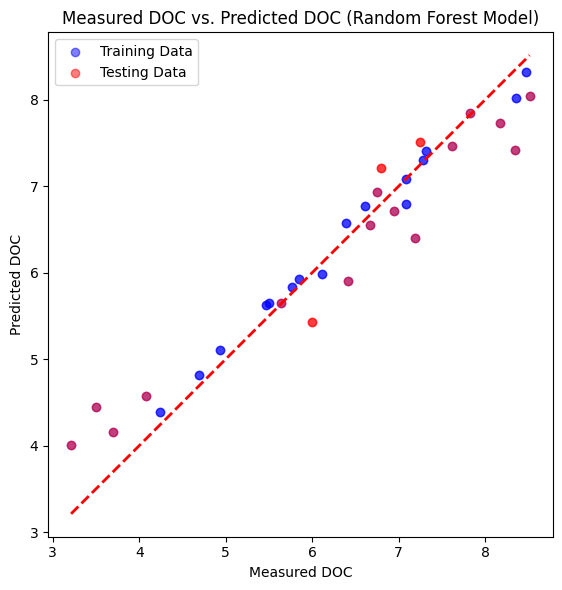

In [34]:
import matplotlib.pyplot as plt

# Create a scatter plot for both training and testing data
plt.figure(figsize=(8, 6))
plt.scatter(data_train['original_DOC'], data_train['predicted_DOC'], c='b', alpha=0.5, label='Training Data')
plt.scatter(data_test['original_DOC'], data_test['predicted_DOC'], c='r', alpha=0.5, label='Testing Data')
plt.title('Measured DOC vs. Predicted DOC (Random Forest Model)')
plt.xlabel('Measured DOC')
plt.ylabel('Predicted DOC')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', linewidth=2)
plt.gca().set_aspect('equal')

# Add legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# ... (the code for data preprocessing remains the same)

# Initialize the AdaBoostRegressor model
model_name = 'AdaBoost'
model = AdaBoostRegressor(random_state=42)

# Fit the Random Forest model
model.fit(X_train, y_train)

# Predict DOC values for the testing data
y_pred = model.predict(X_test)

# Create DataFrames for the training and testing data with all bands and the predicted values
data_train = X_train.copy()
data_train['original_DOC'] = y_train
data_train['predicted_DOC'] = model.predict(X_train)

data_test = X_test.copy()
data_test['original_DOC'] = y_test
data_test['predicted_DOC'] = y_pred

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

# Display the predicted DOC values for the training and testing data
print(f'*************Predicted Training data ({model_name})***************')
print(data_train)

print(f'*************Predicted Testing data ({model_name})***************')
print(data_test)

# Create a dataframe to store the results
evaluation_df_rf = pd.DataFrame({
    'Model': [model_name],
    'R^2': [r2],
    'MSE': [mse],
    'RMSE': [rmse],
    'MAE': [mae]
})

# Print the dataframe
print('# Bands AS FEATURES 7 day window/n')
print(evaluation_df_rf)


*************Predicted Training data (AdaBoost)***************
           blue     green       red       nir     swir1     swir2  \
8707   0.039720  0.045363  0.041460  0.054413  0.038376  0.033618   
15756  0.001372  0.005697  0.004121  0.005344  0.002748  0.001723   
13366  0.056690  0.057213  0.047564  0.066861  0.020162  0.011168   
16161  0.010175  0.011214  0.006472  0.006367  0.002205  0.001207   
13319  0.042527  0.052059  0.049292  0.062405  0.043734  0.037598   
4740   0.033989  0.040153  0.036530  0.052320  0.032301  0.026571   
16890  0.030378  0.040856  0.037685  0.076870  0.045024  0.034976   
15208  0.003527  0.006367  0.002484  0.006919  0.003809  0.003349   
1120   0.015444  0.019530  0.016494  0.036431  0.007870  0.003306   
6758   0.033849  0.038992  0.033317  0.048224  0.026427  0.023881   
13420  0.013876  0.015407  0.009152  0.029586  0.006901  0.006647   
4092   0.035329  0.037868  0.036789  0.053690  0.032745  0.026897   
15754  0.001372  0.005697  0.004121  0.0

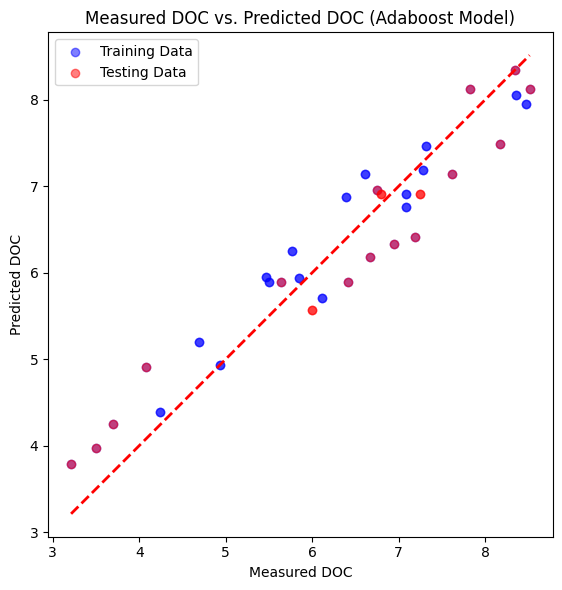

In [36]:
import matplotlib.pyplot as plt

# Create a scatter plot for both training and testing data
plt.figure(figsize=(8, 6))
plt.scatter(data_train['original_DOC'], data_train['predicted_DOC'], c='b', alpha=0.5, label='Training Data')
plt.scatter(data_test['original_DOC'], data_test['predicted_DOC'], c='r', alpha=0.5, label='Testing Data')
plt.title('Measured DOC vs. Predicted DOC (Adaboost Model)')
plt.xlabel('Measured DOC')
plt.ylabel('Predicted DOC')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', linewidth=2)
plt.gca().set_aspect('equal')

# Add legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [37]:
# Print the size (number of data points) for training and testing data
print(f"Size of Training Data: {len(data_train)} data points")
print(f"Size of Testing Data: {len(data_test)} data points")


Size of Training Data: 47 data points
Size of Testing Data: 21 data points


In [42]:
import pandas as pd

# Assuming df_all_lakes is your DataFrame
#'blue', 'green', 'red', 'nir', 'swir1', 'swir2'
# Reorder the columns as desired
new_order = ['blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'temp', 'DATE_SMP','SITE_NAME', 'LAKE_LABEL']
df_all_lakes = df_all_lakes[new_order]

# Drop rows with missing values
# df_all_lakes.dropna(inplace=True)


In [43]:
# Extract only the first four bands from the DataFrame
X_TEST = df_all_lakes.iloc[:, :6]

# Print the DataFrame
(X_TEST)

,blue,green,red,nir,swir1,swir2
31313,0.029191,0.036949,0.029565,0.051717,0.020518,0.014701
26780,0.017348,0.021836,0.013096,0.032249,0.007527,0.005015
17133,0.020657,0.027174,0.022002,0.042420,0.016278,0.011549
26550,0.012871,0.017629,0.011512,0.031867,0.006974,0.003469
2857,0.012063,0.019967,0.014522,0.075066,0.034134,0.015382
...,...,...,...,...,...,...
31675,0.006152,0.010452,0.007950,0.013503,0.006888,0.003948
15878,0.004006,0.008483,0.003000,0.009826,0.005244,0.003418
31246,0.005061,0.013215,0.011198,0.020514,0.009919,0.005331
14530,0.005958,0.010078,0.007055,0.012427,0.006355,0.003760


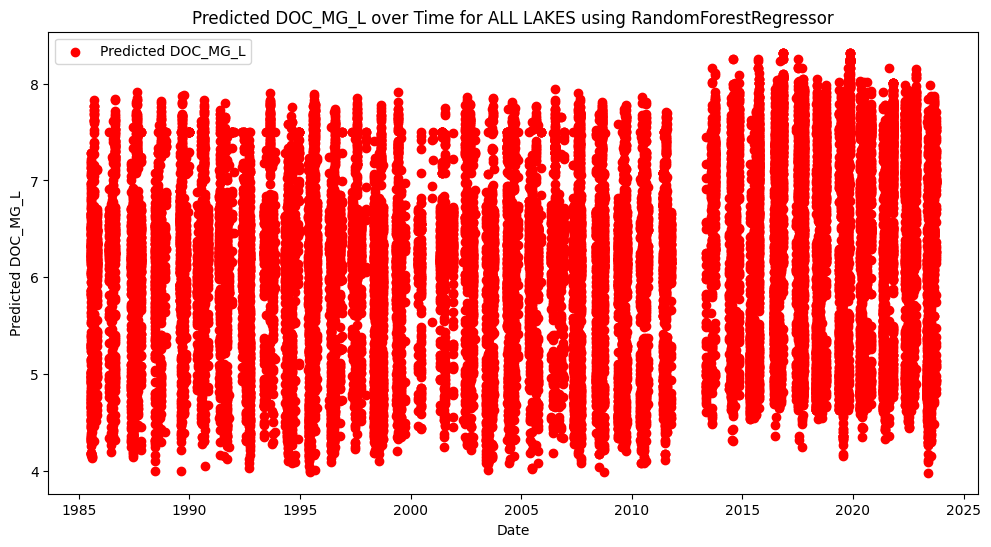

In [51]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor


# Initialize the GradientBoosting
RandomForestRegressor_model = RandomForestRegressor(random_state=42)

RandomForestRegressor_model.fit(X_train, y_train)

# Use the trained model to predict the target variable for the new dataset
predicted_values_all_lakes = RandomForestRegressor_model.predict(X_TEST)



# Assuming 'DOC_MG_L' is the column where you want to store the predictions in 'df_all_lakes'
df_all_lakes['predicted_DOC'] = predicted_values_all_lakes






import matplotlib.pyplot as plt

# Assuming you already have the 'DATE_SMP' column in 'df_all_lakes' (if not, you can add it back)

# Create a copy of the original DataFrame to avoid modifying the original data
df_plot = df_all_lakes.copy()
# Add the predicted values to the DataFrame
df_plot['predicted_DOC'] = predicted_values_all_lakes

# Sort the DataFrame by 'DATE_SMP'
df_plot.sort_values(by='DATE_SMP', inplace=True)

# Filter only the data for 'Big Moose Lake'
#df_plot = df_plot[df_plot['LAKE_LABEL'] == 34]

# Plot the predicted 'DOC_MG_L' values over the 'DATE_SMP' column
plt.figure(figsize=(12, 6))
plt.scatter(df_plot['DATE_SMP'], df_plot['predicted_DOC'], label='Predicted DOC_MG_L', color='red')
plt.xlabel('Date')
plt.ylabel('Predicted DOC_MG_L')
# plt.ylim(0,6)
plt.title('Predicted DOC_MG_L over Time for ALL LAKES using RandomForestRegressor')
plt.legend()
plt.show()


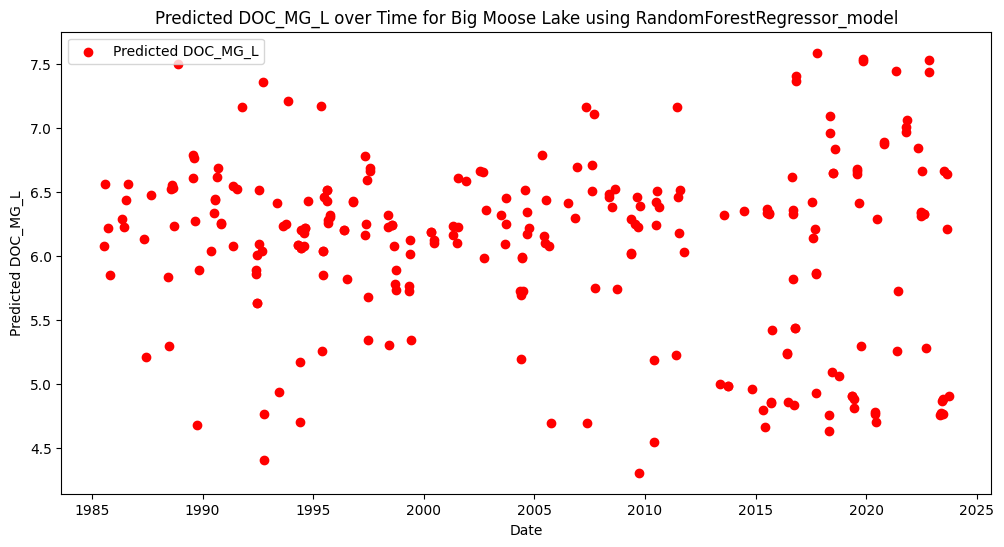

In [45]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor


# Initialize the GradientBoosting
RandomForestRegressor_model =  RandomForestRegressor(random_state=42)

RandomForestRegressor_model.fit(X_train, y_train)

# Use the trained model to predict the target variable for the new dataset
predicted_values_all_lakes = RandomForestRegressor_model.predict(X_TEST)



# Assuming 'DOC_MG_L' is the column where you want to store the predictions in 'df_all_lakes'
df_all_lakes['predicted_DOC'] = predicted_values_all_lakes






import matplotlib.pyplot as plt

# Assuming you already have the 'DATE_SMP' column in 'df_all_lakes' (if not, you can add it back)

# Create a copy of the original DataFrame to avoid modifying the original data
df_plot = df_all_lakes.copy()
# Add the predicted values to the DataFrame
df_plot['predicted_DOC'] = predicted_values_all_lakes

# Sort the DataFrame by 'DATE_SMP'
df_plot.sort_values(by='DATE_SMP', inplace=True)

# Filter only the data for 'Big Moose Lake'
df_plot_BigMOOSELAKE = df_plot[df_plot['LAKE_LABEL'] == 34]

# Plot the predicted 'DOC_MG_L' values over the 'DATE_SMP' column
plt.figure(figsize=(12, 6))
plt.scatter(df_plot_BigMOOSELAKE['DATE_SMP'], df_plot_BigMOOSELAKE['predicted_DOC'], label='Predicted DOC_MG_L', color='red')
plt.xlabel('Date')
plt.ylabel('Predicted DOC_MG_L')
# plt.ylim(0,6)
plt.title('Predicted DOC_MG_L over Time for Big Moose Lake using RandomForestRegressor_model')
plt.legend()
plt.show()


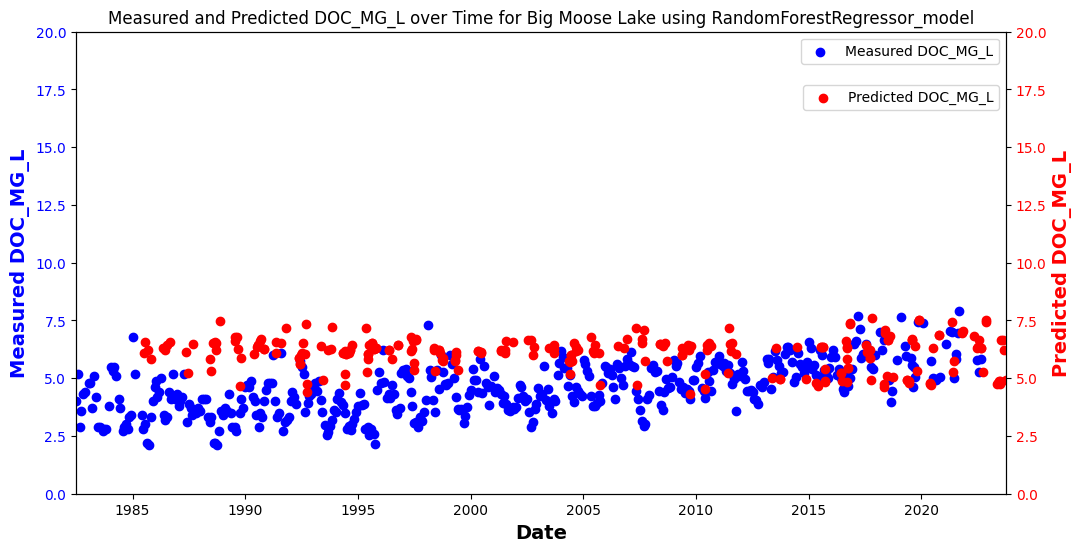

In [48]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

data_modified_BigMOOSELAKE = concatenated_df[concatenated_df['SITE_NAME'] == 'Big Moose Lake']

df_plot_BigMOOSELAKE  = df_plot[df_plot['LAKE_LABEL'] == 34]

# Plot the measured 'DOC_MG_L' values over the 'DATE_SMP' column on the left y-axis
scatter1 = ax1.scatter(data_modified_BigMOOSELAKE['DATE_SMP'], data_modified_BigMOOSELAKE['DOC_MG_L'], label='Measured DOC_MG_L', color='blue')
ax1.set_xlabel('Date', fontweight='bold', fontsize=14)
ax1.set_ylabel('Measured DOC_MG_L', color='blue', fontweight='bold', fontsize=14)  # Adjust font properties here
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis on the right side
ax2 = ax1.twinx()

# Plot the predicted 'DOC_MG_L' values over the 'DATE_SMP' column on the right y-axis
scatter2 = ax2.scatter(df_plot_BigMOOSELAKE['DATE_SMP'], df_plot_BigMOOSELAKE['predicted_DOC'], label='Predicted DOC_MG_L', color='red')
ax2.set_ylabel('Predicted DOC_MG_L', color='red', fontweight='bold', fontsize=14)  # Adjust font properties here
ax2.tick_params(axis='y', labelcolor='red')

# Set the x-axis limits for both axes to be the same
x_min = min(data_modified_BigMOOSELAKE['DATE_SMP'].min(), df_plot_BigMOOSELAKE['DATE_SMP'].min())
x_max = max(data_modified_BigMOOSELAKE['DATE_SMP'].max(), df_plot_BigMOOSELAKE['DATE_SMP'].max())

ax1.set_xlim(x_min, x_max)
ax2.set_xlim(x_min, x_max)

y_min = 0
y_max = 20

ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)

# Place the legend at the top-right corner of the plot
ax1.legend(loc='upper right')
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.9))

plt.title('Measured and Predicted DOC_MG_L over Time for Big Moose Lake using RandomForestRegressor_model')
plt.show()

